# First: Giving opinion based on comment 

### Loading data without using classes

In [1]:
import json

file_name = './Books_small_10000.json'

reviews = []
with open(file_name) as f:
    for line in f:
        review = json.loads(line) 
        reviews.append((review['reviewText'], review['overall']))
reviews[4]

('It was a decent read.. typical story line. Nothing unsavory as so many are. Just a slice of life, plausible.',
 3.0)

### Organising code with using classes

In [2]:
import random

class Sentiment:
    NEGATIVE = 'NEGATIVE'
    NEUTRAL = 'NEUTRAL'
    POSITIVE = 'POSITIVE'

class Review:
    def __init__(self, text, score):
        self.score = score
        self.text = text
        self.sentiment = self.get_sentiment() # opinia
        
    def get_sentiment(self):
        if self.score <= 2:
            return Sentiment.NEGATIVE
        elif self.score == 3:
            return Sentiment.NEUTRAL
        else: # score = 4 or 5
            return Sentiment.POSITIVE
        
class ReviewContainer:
    def __init__(self, reviews):
        self.reviews = reviews
        
    def get_text(self):
        return [x.text for x in self.reviews]
            
    def get_sentiment(self):
        return [x.sentiment for x in self.reviews]
        
    def evenly_distribute(self):
        negative = list(filter(lambda x: x.sentiment == Sentiment.NEGATIVE, self.reviews))
        positive = list(filter(lambda x: x.sentiment == Sentiment.POSITIVE, self.reviews))
        positive_shrunk = positive[:len(negative)]
        self.reviews = negative + positive_shrunk
        random.shuffle(self.reviews)
        
        
#         print(negative[0].text)
#         print(len(negative))
#         print(len(positive))

### Loading data

In [3]:

file_name = './Books_small_10000.json'

reviews = []
with open(file_name) as f:
    for line in f:
        review = json.loads(line)
        reviews.append(Review(review['reviewText'], review['overall'])) # dodajemy obiekty klasy Review
                       
#print(reviews[6][1]) # if we do not use classes and we want to get to score ore text
#reviews[6].sentiment
reviews[6].sentiment
# reviews[6].score
# reviews[6].text

'NEGATIVE'

In [4]:
len(reviews)

10000



### Data preparation

In [28]:
from sklearn.model_selection import train_test_split

training, test = train_test_split(reviews, test_size = 0.33, random_state =42)

train_container = ReviewContainer(training)
test_container = ReviewContainer(test)

# len(cont.reviews)

In [6]:
len(training)

6700

In [7]:
print(training[2].text)

One of Francine Rivers best series books!


In [8]:
print(training[0].sentiment)

POSITIVE


In [9]:
from sklearn.model_selection import train_test_split
training, test = train_test_split(reviews, test_size = 0.33, random_state =42)

train_container.evenly_distribute()

train_x = train_container.get_text()
train_y = train_container.get_sentiment()

test_container.evenly_distribute()

test_x = test_container.get_text()
test_y = test_container.get_sentiment()

print(train_y.count(Sentiment.NEGATIVE))
print(train_y.count(Sentiment.POSITIVE))

436
436


In [10]:
len(train_container.reviews)

872

#### Bugs of word vectorization


In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = TfidfVectorizer()
# train_x_vector = vectorizer.fit_transform(train_x) # otrzymujemy ogromną macierz

# we can do above in 2 steps, as below
vectorizer.fit(train_x) # fit the model

train_x_vectors = vectorizer.transform(train_x) # transform into vector
test_x_vectors =vectorizer.transform(test_x)

print(train_x[2])
print(train_x_vectors[2])



# TfidfVectorizer skip words like so, this, was, is etc. because they do not add any additional information


Big disappointment . Most if the items listed were insignificant. There was no room to add very many extra items.
  (0, 8670)	0.1352071890217374
  (0, 8608)	0.0775786965979278
  (0, 8497)	0.11112207682792513
  (0, 8052)	0.058381304911323026
  (0, 7951)	0.1163571125901556
  (0, 7929)	0.05370378654413455
  (0, 6758)	0.2617218961506506
  (0, 5384)	0.12844714987596545
  (0, 5196)	0.15518376107656023
  (0, 4891)	0.14316781508659054
  (0, 4712)	0.250432125834321
  (0, 4291)	0.6359992573564728
  (0, 4142)	0.3179996286782364
  (0, 3968)	0.11486781964089131
  (0, 2897)	0.26864679012216014
  (0, 2286)	0.250432125834321
  (0, 886)	0.2027746918656528
  (0, 220)	0.23750861585392302


### Clasification

#### Linear SVM

In [12]:
from sklearn.svm import SVC

clf_svm = SVC(kernel = 'linear')

clf_svm.fit(train_x_vectors, train_y)

test_x[2]

y_pred = clf_svm.predict(test_x_vectors[0])


#### Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier


clf_dec = DecisionTreeClassifier()
clf_dec.fit(train_x_vectors, train_y)

test_x[2]

y_pred = clf_dec.predict(test_x_vectors[0])


#### Naive Bayes

In [14]:
from sklearn.naive_bayes import MultinomialNB

clf_gnb = MultinomialNB()
clf_gnb.fit(train_x_vectors, train_y)

y_pred = clf_gnb.predict(test_x_vectors[0])

#### Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression()
clf_log.fit(train_x_vectors, train_y)

y_pred = clf_log.predict(test_x_vectors) #[3]
# print(y_pred)

### Evaluation

In [16]:
# Mean Accuracy
print(clf_svm.score(test_x_vectors, test_y) )
print(clf_dec.score(test_x_vectors, test_y))
print(clf_log.score(test_x_vectors, test_y))
print(clf_gnb.score(test_x_vectors, test_y))

0.8076923076923077
0.6586538461538461
0.8052884615384616
0.8125


In [17]:
# F1 Scores (za dużo pozytywnych a za mało negatywnych i neutralnych opinii)
from sklearn.metrics import f1_score

f1_score(test_y, clf_svm.predict(test_x_vectors), average=None, labels = [Sentiment.POSITIVE, Sentiment.NEGATIVE])
# f1_score(test_y, clf_dec.predict(test_x_vectors), average=None, labels = [Sentiment.POSITIVE, Sentiment.NEUTRAL, Sentiment.NEGATIVE])
# f1_score(test_y, clf_log.predict(test_x_vectors), average=None, labels = [Sentiment.POSITIVE, Sentiment.NEGATIVE])
# f1_score(test_y, clf_gnb.predict(test_x_vectors), average=None, labels = [Sentiment.POSITIVE, Sentiment.NEUTRAL, Sentiment.NEGATIVE])

# all models work good on positive comment but not very well on negative and neutral
# as we distributed test values evenly the output is higher also for negative 

array([0.80582524, 0.80952381])

In [18]:
train_y[0:5]

['POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE']

In [19]:
test_y.count(Sentiment.POSITIVE)

208

### we need to add another class which help to evenly distribute positive and negative sentiments

In [20]:

test_set  =['I enjoyed it, 5 stars', 'bad book, so not but', 'horrible, waste of time']
new_test = vectorizer.transform(test_set)

clf_svm.predict(new_test)

array(['POSITIVE', 'NEGATIVE', 'NEGATIVE'], dtype='<U8')


### Grid search

In [21]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ('linear', 'rbf'), 'C': (1, 4, 8, 16)}

svc = SVC()
clf = GridSearchCV(svc, parameters, cv =5)
clf.fit(train_x_vectors, train_y)

# when ypu do not now what parameters to chose for a clasifier, use gridsearch wnd this function finds the best parameters values

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (1, 4, 8, 16), 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [22]:
print(clf_svm.score(test_x_vectors, test_y))

0.8076923076923077


### Model Saving - pickle


#### Save Model

In [24]:
# if we have clasifier which we trained and do not want to train it one more time then we can save it
import pickle

with open('./Sci-kit-learn-first-Project.pkl', 'wb') as f:
    pickle.dump(clf, f)

#### Load Model

In [25]:
with open('./Sci-kit-learn-first-Project.pkl', 'rb') as f:
    loaded_clf = pickle.load(f)

In [29]:
print(test_x[1])
loaded_clf.predict(test_x_vectors[1])

Beautiful book.  Can't put it down.


array(['POSITIVE'], dtype='<U8')

### Confusion matrix

[[170  38]
 [ 43 165]]
              precision    recall  f1-score   support

    NEGATIVE       0.80      0.82      0.81       208
    POSITIVE       0.81      0.79      0.80       208

    accuracy                           0.81       416
   macro avg       0.81      0.81      0.81       416
weighted avg       0.81      0.81      0.81       416



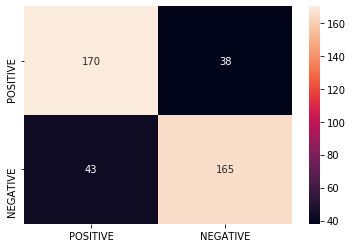

In [36]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
import pandas as pd
import matplotlib as plt


labels = [Sentiment.POSITIVE, Sentiment.NEGATIVE]
# print(len(test_y))
# print(len(y_pred))
cm = confusion_matrix(test_y, y_pred)
print(confusion_matrix(test_y,y_pred))  
print(classification_report(test_y,y_pred)) 

df_cm = pd.DataFrame(cm, index=labels, columns=labels)

sn.heatmap(df_cm, annot=True, fmt='d')